In [78]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

from matplotlib import pyplot as plt
from matplotlib_venn import venn3

import statsmodels.api as sm

import seaborn as sns

# Read data

In [2]:
df = pd.read_parquet('/Users/julianeoliveira/Documents/github/aesop-detection-models/data/raw/202322_202522_ears_evi_mmaing.parquet')

In [171]:
df_aih = pd.read_parquet('/Users/julianeoliveira/Documents/github/Bivariate_Anomaly_Detection_Primary_Health_Care_Drug_Selling_ILI_surveillance/Results/data_manuscript_warning_aih_muni2.parquet')

# Process

In [3]:
df.columns

Index(['co_ibge', 'year_week', 'sinal_ears_ivas', 'sinal_evi_ivas',
       'sinal_mmaing_ivas', 'P_growth_aps_ivas', 'limite_ears_ivas',
       'limite_evi_ivas', 'limite_mmaing_ivas', 'atend_ivas', 'atend_totais'],
      dtype='object')

In [4]:
df = df[['co_ibge', 'year_week', 'sinal_ears_ivas', 'sinal_evi_ivas',
       'sinal_mmaing_ivas', 'P_growth_aps_ivas', 'atend_ivas', 'atend_totais']]

In [6]:
df = df.assign(epiyear = df.year_week.str[:4].astype(int))

# Period of study and basic counts

In [7]:
df.year_week.nunique()

105

In [8]:
df.year_week.max()

'2025-22'

In [9]:
df.year_week.min()

'2023-22'

In [10]:
df.co_ibge.nunique()

5570

In [11]:
n = df.year_week.nunique()*df.co_ibge.nunique()

df.year_week.nunique()*df.co_ibge.nunique()

584850

# Count warnings by model

In [12]:
df.head()

,co_ibge,year_week,sinal_ears_ivas,sinal_evi_ivas,sinal_mmaing_ivas,P_growth_aps_ivas,atend_ivas,atend_totais,epiyear
0,110090,2023-22,1,0,0,0.991111,26,187,2023
1,110146,2023-22,1,0,0,1.000000,10,118,2023
2,120032,2023-22,0,0,0,0.387778,16,243,2023
3,120045,2023-22,0,0,0,0.390000,14,494,2023
4,130150,2023-22,1,0,0,0.955556,68,428,2023


In [13]:
print(df.sinal_evi_ivas.sum())
round(df.sinal_evi_ivas.sum()*100/n,1)

99388


17.0

In [14]:
print(df.sinal_ears_ivas.sum())
round(df.sinal_ears_ivas.sum()*100/n,1)

88093


15.1

In [15]:
print(df.sinal_mmaing_ivas.sum())

round(df.sinal_mmaing_ivas.sum()*100/n,1)

94624


16.2

In [16]:
df.groupby(['epiyear'])['sinal_mmaing_ivas'].sum()

epiyear
2023    19980.0
2024    49769.0
2025    24875.0
Name: sinal_mmaing_ivas, dtype: float64

In [17]:
df.groupby(['epiyear'])['sinal_ears_ivas'].sum()

epiyear
2023    12133.0
2024    46321.0
2025    29639.0
Name: sinal_ears_ivas, dtype: float64

In [18]:
df.groupby(['epiyear'])['sinal_evi_ivas'].sum()

epiyear
2023    30756.0
2024    48275.0
2025    20357.0
Name: sinal_evi_ivas, dtype: float64

In [19]:
df.sinal_mmaing_ivas.isna().astype(int).sum()/len(df)

0.0

In [20]:
df.sinal_ears_ivas.isna().astype(int).sum()/len(df)

0.0

In [21]:
df.sinal_evi_ivas.isna().astype(int).sum()/len(df)

0.0

# Comparison between models

In [22]:
n_ears = df.sinal_ears_ivas.sum()

n_evi = df.sinal_evi_ivas.sum()

n_mmaing = df.sinal_mmaing_ivas.sum()

In [23]:
print(len(df[(df.sinal_ears_ivas == 1) & (df.sinal_evi_ivas == 1)]))

print(round(len(df[(df.sinal_ears_ivas == 1) & (df.sinal_evi_ivas == 1)])*100/n_ears,1))

print(round(len(df[(df.sinal_ears_ivas == 1) & (df.sinal_evi_ivas == 1)])*100/n_evi,1))

5411
6.1
5.4


In [24]:
print(len(df[(df.sinal_ears_ivas == 1) & (df.sinal_mmaing_ivas == 1)]))

print(round(len(df[(df.sinal_ears_ivas == 1) & (df.sinal_mmaing_ivas == 1)])*100/n_ears,1))

print(round(len(df[(df.sinal_ears_ivas == 1) & (df.sinal_mmaing_ivas == 1)])*100/n_mmaing,1))

51510
58.5
54.4


In [25]:
print(len(df[(df.sinal_evi_ivas == 1) & (df.sinal_mmaing_ivas == 1)]))

print(round(len(df[(df.sinal_evi_ivas == 1) & (df.sinal_mmaing_ivas == 1)])*100/n_evi,1))

print(round(len(df[(df.sinal_evi_ivas == 1) & (df.sinal_mmaing_ivas == 1)])*100/n_mmaing,1))

27962
28.1
29.6


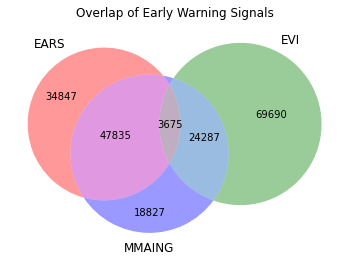

In [26]:
dta_plot = df[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[df["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[df["sinal_evi_ivas"] == 1])
mmaing = set(dta_plot.index[df["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()


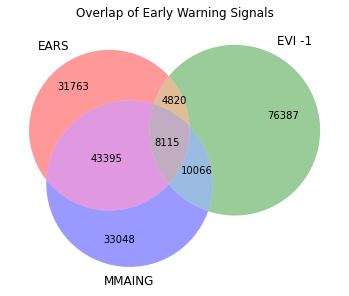

In [27]:
dta_plot = df[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[df["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[df["sinal_evi_ivas"].shift(-1) == 1])
mmaing = set(dta_plot.index[df["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI -1", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()


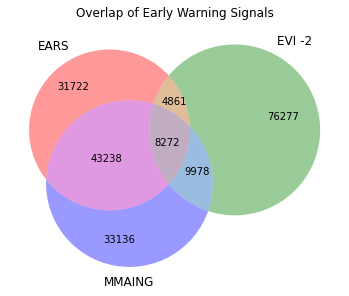

In [28]:
dta_plot = df[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[df["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[df["sinal_evi_ivas"].shift(-2) == 1])
mmaing = set(dta_plot.index[df["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI -2", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()

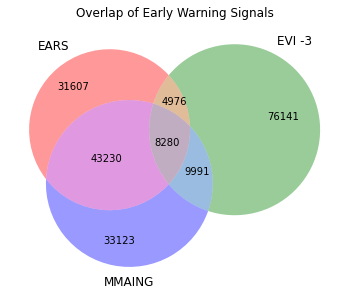

In [29]:
dta_plot = df[['sinal_ears_ivas','sinal_evi_ivas','sinal_mmaing_ivas']].copy()
# Convert to boolean sets
ears = set(dta_plot.index[df["sinal_ears_ivas"] == 1])
evi = set(dta_plot.index[df["sinal_evi_ivas"].shift(-3) == 1])
mmaing = set(dta_plot.index[df["sinal_mmaing_ivas"] == 1])

# Plot Venn
plt.figure(figsize=(6,6))
venn3([ears, evi, mmaing],
      set_labels=("EARS", "EVI -3", "MMAING"))
plt.title("Overlap of Early Warning Signals")
plt.show()

# Count lagged compartisons

In [30]:
def antici_count(data_res, col_warn_s1, col_warn_s2, col_code):
    """
    Function to compute anticipated counts of warnings and missed warnings 
    across different lead times per unique region.
    
    Parameters:
    data_res (pd.DataFrame): Input DataFrame.
    col_warn_s1 (str): Column name for the primary warning signal (e.g., PHC warnings).
    col_warn_s2 (str): Column name for the secondary warning signal (e.g., AIH warnings).
    col_code (str): Column name identifying the region.

    Returns:
    pd.DataFrame: Summary DataFrame with counts of early, concurrent, and missed warnings.
    """
    
    lst_count = []

    for code in data_res[col_code].unique():
    
        dta = data_res[data_res[col_code] == code].copy().reset_index()  # Use only data for the current region

        # Find sets based on PHC warnings (col_warn_s1) and AIH warnings (col_warn_s2) at different lags
        set3 = dta[(dta[col_warn_s1] == 1) & (dta[col_warn_s2].shift(-3) == 1)].index + 3
        set2 = dta[(dta[col_warn_s1] == 1) & (dta[col_warn_s2].shift(-3) == 0) & (dta[col_warn_s2].shift(-2) == 1)].index + 2
        set1 = dta[(dta[col_warn_s1] == 1) & 
                   (dta[col_warn_s2].shift(-3) == 0) & 
                   (dta[col_warn_s2].shift(-2) == 0) & 
                   (dta[col_warn_s2].shift(-1) == 1)].index + 1
        set0 = dta[(dta[col_warn_s1] == 1) & 
                   (dta[col_warn_s2] == 1) & 
                   (dta[col_warn_s2].shift(-3) == 0) & 
                   (dta[col_warn_s2].shift(-2) == 0) & 
                   (dta[col_warn_s2].shift(-1) == 0)].index
        
        # Identify True Negatives (TN)
        set_tn1 = dta[(dta[col_warn_s2] == 0) &  # AIH warning is 0
                      (dta[col_warn_s1] == 0) & 
                      (dta[col_warn_s1].shift(1).fillna(0) == 0) & 
                      (dta[col_warn_s1].shift(2).fillna(0) == 0) & 
                      (dta[col_warn_s1].shift(3).fillna(0) == 0)
                    ].index
        
        set_fp1 = dta[(dta[col_warn_s2] == 0) & 
                   ((dta[col_warn_s1] == 1) | 
                   (dta[col_warn_s1].shift(3).fillna(0) == 1) | 
                   (dta[col_warn_s1].shift(2).fillna(0) == 1) | 
                   (dta[col_warn_s1].shift(1).fillna(0) == 1))].index

        # Warnings in PHC right after an AIH warning (possibly not anticipated but concurrent)
        set1_after = dta[(dta[col_warn_s1].shift(-1) == 1) & (dta[col_warn_s2] == 1)].index
        
       

        # Compute counts of warnings at different lead times
        n3 = len(set3)
        n2 = len(set(set2) - set(set3))
        n1 = len((set(set1) - set(set3)) - set(set2))
        n0 = len(((set(set0) - set(set3)) - set(set2)) - set(set1))
        n1_after = len((((set(set1_after) - set(set3)) - set(set2)) - set(set1)) - set(set0))
        n_tn1 = len(set_tn1) 
        n_fp1 = len(set_fp1)

        # Drop all anticipated and concurrent warnings to count missed ones
        ind_drop = set(set3) | set(set2) | set(set1) | set(set0) #| set(set1_after)
        missed = dta.drop(index=ind_drop)[col_warn_s2].sum()
        
        TP = n3 + n2 + n1 + n0
        
        # outra forma de calcular o FN
        #set_FN = dta[(dta[col_warn_s2] == 1) &  
        #           (dta[col_warn_s1] == 0) & 
        #           (dta[col_warn_s1].shift(3).fillna(0) == 0) & 
        #           (dta[col_warn_s1].shift(2).fillna(0) == 0) & 
        #           (dta[col_warn_s1].shift(1).fillna(0) == 0)].index
        
        
        # Create the results dictionary for this region
        data = {
            col_code: [code],
            'n3': [n3],
            'n2': [n2],
            'n1': [n1],
            'n0': [n0],
            'n1_after': [n1_after],
            'missed': [missed],
            'TP': [TP],
            'TN1': [n_tn1], # True Negative
            'FP1': [n_fp1], # False Positive
            'FN': missed,
            'total_aih_warning': [dta[col_warn_s2].sum()]
        }

        # Append to results list
        data_output = pd.DataFrame(data)
        lst_count.append(data_output)

    # Combine all results into a single DataFrame
    df_warning_count = pd.concat(lst_count, ignore_index=True)
    
    return df_warning_count


In [31]:
def summarize_performance(df_warning_count):
    """
    Summarizes performance metrics including Sensitivity, Specificity, PPV, F1-score, POD, and FPR.
    
    Parameters:
    df_warning_count (pd.DataFrame): Dataframe containing warning counts and classification metrics.
    
    Returns:
    pd.DataFrame: Summary table with performance metrics.
    """
    # Total AIH Warnings
    total_warnings = df_warning_count.total_aih_warning.sum()
    
    # Early Detection (1 to 3 weeks)
    early_count = df_warning_count.n3.sum() + df_warning_count.n2.sum() + df_warning_count.n1.sum()
    early_rate = round((early_count * 100) / total_warnings, 1)
    
    # Timely Detection (0 week)
    timely_count = df_warning_count.n0.sum()
    timely_rate = round((timely_count * 100) / total_warnings, 1)
    
    # Missed Warnings
    missed_count = df_warning_count.missed.sum()
    missed_rate = round((missed_count * 100) / total_warnings, 1)
    
    # Classification Metrics
    TP = df_warning_count.TP.sum()
    FN = df_warning_count.FN.sum()
    TN = df_warning_count.TN1.sum()
    FP = df_warning_count.FP1.sum()

    
    # Sensitivity (Recall)
    Sensitivity = round((TP / (TP + FN)) * 100, 1) if (TP + FN) > 0 else 0
    
    # Specificity
    Specificity = round((TN / (TN + FP)) * 100, 1) if (TN + FP) > 0 else 0
    
    # Positive Predictive Value (PPV)
    PPV = round((TP / (TP + FP)) * 100, 1) if (TP + FP) > 0 else 0
    
    # F1-score
    F1_score = round(2 * (TP / (TP + FN)) * (TP / (TP + FP)) / ((TP / (TP + FN)) + (TP / (TP + FP))), 2) if ((TP / (TP + FN)) + (TP / (TP + FP))) > 0 else 0
    
    Precision = round(((TP + TN) / (TP + TN + FP + FN) * 100), 1) if (TP + TN + FP + FN) > 0 else 0

    # Probability of Detection (POD)
    POD = round(((early_count + timely_count + df_warning_count.n1_after.sum()) / total_warnings) * 100, 1)
    
    # False Positive Rate (FPR)
    FPR = round((FP / (FP + TN)) * 100, 1) if (FP + TN) > 0 else 0
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        "Metric": ["Total Warnings", "Early Detection (1-3 weeks)", "Timely Detection (0 weeks)", "Missed Warnings",
                   "Sensitivity ", "Specificity", "PPV",  "POD", "FPR","Precision (%)"],
        "Value": [total_warnings, f"{early_count} ({early_rate}%)", f"{timely_count} ({timely_rate}%)", f"{missed_count} ({missed_rate}%)",
                   f"{Sensitivity}%", f"{Specificity}%", f"{PPV}%", f"{POD}%", f"{FPR}%", f"{Precision}%"]
    })
    
    return summary_df



## EARS --> EVI

In [129]:
df_warning_count = antici_count(df, 'sinal_ears_ivas', 'sinal_evi_ivas', 'co_ibge')

In [130]:
df_warning_count.columns

Index(['co_ibge', 'n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1',
       'FP1', 'FN', 'total_aih_warning'],
      dtype='object')

In [131]:
performance_summary = summarize_performance(df_warning_count)

In [132]:
performance_summary

,Metric,Value
0,Total Warnings,99388
1,Early Detection (1-3 weeks),3791 (3.8%)
2,Timely Detection (0 weeks),4278 (4.3%)
3,Missed Warnings,91319 (91.9%)
4,Sensitivity,8.1%
5,Specificity,62.5%
6,PPV,4.2%
7,POD,17.0%
8,FPR,37.5%
9,Precision (%),53.3%


In [133]:
table_ears_evi = df_warning_count.copy()


lst = ['n3', 'n2', 'n1', 'n0', 'n1_after', 'missed', 'TP', 'TN1', 'FP1', 'FN']

table_ears_evi = table_ears_evi.rename(columns={col: f"{col}_ears_evi" for col in lst
                             })


table_ears_evi = table_ears_evi.rename(columns={'total_aih_warning': 'total_evi_warning'})

In [134]:
table_ears_evi

,co_ibge,n3_ears_evi,n2_ears_evi,n1_ears_evi,n0_ears_evi,n1_after_ears_evi,missed_ears_evi,TP_ears_evi,TN1_ears_evi,FP1_ears_evi,FN_ears_evi,total_evi_warning
0,110090,0,0,0,0,2,19,0,48,38,19,19
1,110146,1,1,0,3,1,4,5,56,40,4,9
2,120032,0,1,1,1,1,19,3,64,19,19,22
3,120045,0,0,0,1,1,14,1,43,47,14,15
4,130150,0,0,0,2,3,17,2,49,37,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,521720,0,0,0,1,3,15,1,47,42,15,16
5566,521925,0,0,0,0,3,16,0,55,34,16,16
5567,521970,1,0,0,2,2,19,3,46,37,19,22
5568,522045,1,0,0,0,1,18,1,41,45,18,19


## EARS --> MMAING

In [36]:
df_warning_count = antici_count(df, 'sinal_ears_ivas', 'sinal_mmaing_ivas', 'co_ibge')

In [37]:
df_warning_count

,co_ibge,n3,n2,n1,n0,n1_after,missed,TP,TN1,FP1,FN,total_aih_warning
0,110090,6,1,0,1,0,7,8,61,29,7,15
1,110146,3,0,2,2,1,2,7,59,37,2,9
2,120032,0,0,2,2,3,17,4,68,16,17,21
3,120045,1,1,1,3,0,7,6,53,39,7,13
4,130150,1,1,2,3,5,18,7,54,26,18,25
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,521720,1,1,1,4,8,20,7,49,29,20,27
5566,521925,3,2,0,2,8,13,7,63,22,13,20
5567,521970,5,0,1,3,3,18,9,51,27,18,27
5568,522045,5,4,0,2,8,20,11,46,28,20,31


In [38]:
performance_summary = summarize_performance(df_warning_count)

In [39]:
performance_summary

,Metric,Value
0,Total Warnings,94624
1,Early Detection (1-3 weeks),22260 (23.5%)
2,Timely Detection (0 weeks),10775 (11.4%)
3,Missed Warnings,61589 (65.1%)
4,Sensitivity,34.9%
5,Specificity,71.8%
6,PPV,19.3%
7,POD,57.8%
8,FPR,28.2%
9,Precision (%),65.9%


## EVI --> EARS

In [40]:
df_warning_count = antici_count(df, 'sinal_evi_ivas', 'sinal_ears_ivas', 'co_ibge')

In [41]:
df_warning_count

,co_ibge,n3,n2,n1,n0,n1_after,missed,TP,TN1,FP1,FN,total_aih_warning
0,110090,2,2,0,0,0,13,4,42,46,13,17
1,110146,4,1,0,0,0,14,5,63,23,14,19
2,120032,0,1,0,0,1,8,1,36,60,8,9
3,120045,3,3,1,0,0,9,7,52,37,9,16
4,130150,2,2,0,2,0,7,6,46,46,7,13
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,521720,7,1,0,0,0,10,8,55,32,10,18
5566,521925,3,0,2,0,0,13,5,45,42,13,18
5567,521970,4,1,0,1,0,10,6,37,52,10,16
5568,522045,6,1,0,0,0,21,7,38,39,21,28


In [42]:
performance_summary = summarize_performance(df_warning_count)

In [43]:
performance_summary

,Metric,Value
0,Total Warnings,88093
1,Early Detection (1-3 weeks),22503 (25.5%)
2,Timely Detection (0 weeks),1206 (1.4%)
3,Missed Warnings,64384 (73.1%)
4,Sensitivity,26.9%
5,Specificity,48.7%
6,PPV,8.5%
7,POD,27.6%
8,FPR,51.3%
9,Precision (%),45.4%


## EVI --> MMAING

In [44]:
df_warning_count = antici_count(df, 'sinal_evi_ivas', 'sinal_mmaing_ivas', 'co_ibge')

In [45]:
df_warning_count

,co_ibge,n3,n2,n1,n0,n1_after,missed,TP,TN1,FP1,FN,total_aih_warning
0,110090,2,3,0,0,1,10,5,45,45,10,15
1,110146,2,1,1,1,0,4,5,70,26,4,9
2,120032,1,3,4,1,2,12,9,34,50,12,21
3,120045,4,2,0,0,0,7,6,56,36,7,13
4,130150,6,1,3,2,1,13,12,46,34,13,25
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,521720,8,2,2,0,4,15,12,55,23,15,27
5566,521925,2,1,2,4,1,11,9,50,35,11,20
5567,521970,4,4,1,2,4,16,11,36,42,16,27
5568,522045,5,4,1,0,3,21,10,45,29,21,31


In [46]:
performance_summary = summarize_performance(df_warning_count)

In [47]:
performance_summary

,Metric,Value
0,Total Warnings,94624
1,Early Detection (1-3 weeks),33474 (35.4%)
2,Timely Detection (0 weeks),6792 (7.2%)
3,Missed Warnings,54358 (57.4%)
4,Sensitivity,42.6%
5,Specificity,53.0%
6,PPV,14.9%
7,POD,47.3%
8,FPR,47.0%
9,Precision (%),51.3%


## MMAING --> EARS

In [48]:
df_warning_count = antici_count(df, 'sinal_mmaing_ivas', 'sinal_ears_ivas', 'co_ibge')

In [49]:
df_warning_count

,co_ibge,n3,n2,n1,n0,n1_after,missed,TP,TN1,FP1,FN,total_aih_warning
0,110090,5,0,1,1,3,10,7,58,30,10,17
1,110146,1,3,2,1,2,12,7,68,18,12,19
2,120032,3,1,1,0,2,4,5,43,53,4,9
3,120045,2,1,0,3,1,10,6,61,28,10,16
4,130150,3,1,4,3,1,2,11,42,50,2,13
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,521720,5,3,0,1,4,9,9,37,50,9,18
5566,521925,5,0,2,0,4,11,7,49,38,11,18
5567,521970,4,4,1,1,2,6,10,29,60,6,16
5568,522045,12,3,0,0,6,13,15,40,37,13,28


In [50]:
performance_summary = summarize_performance(df_warning_count)

In [51]:
performance_summary

,Metric,Value
0,Total Warnings,88093
1,Early Detection (1-3 weeks),32484 (36.9%)
2,Timely Detection (0 weeks),5710 (6.5%)
3,Missed Warnings,49899 (56.6%)
4,Sensitivity,43.4%
5,Specificity,63.4%
6,PPV,17.4%
7,POD,63.3%
8,FPR,36.6%
9,Precision (%),60.4%


## MMAING --> EVI

In [52]:
df_warning_count = antici_count(df, 'sinal_mmaing_ivas', 'sinal_evi_ivas', 'co_ibge')

In [53]:
df_warning_count

,co_ibge,n3,n2,n1,n0,n1_after,missed,TP,TN1,FP1,FN,total_aih_warning
0,110090,1,0,1,1,2,16,3,49,37,16,19
1,110146,0,0,0,1,3,8,1,67,29,8,9
2,120032,2,0,2,5,4,13,9,32,51,13,22
3,120045,0,0,0,0,2,15,0,53,37,15,15
4,130150,1,0,1,7,4,10,9,34,52,10,19
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,521720,0,0,4,3,5,9,7,32,57,9,16
5566,521925,1,1,1,5,1,8,8,47,42,8,16
5567,521970,0,1,2,6,5,13,9,21,62,13,22
5568,522045,1,1,2,3,7,12,7,33,53,12,19


In [54]:
performance_summary = summarize_performance(df_warning_count)

In [55]:
performance_summary

,Metric,Value
0,Total Warnings,99388
1,Early Detection (1-3 weeks),10273 (10.3%)
2,Timely Detection (0 weeks),16246 (16.3%)
3,Missed Warnings,72869 (73.3%)
4,Sensitivity,26.7%
5,Specificity,55.2%
6,PPV,10.9%
7,POD,41.9%
8,FPR,44.8%
9,Precision (%),50.4%


# Count consecutiveness among the models

In [180]:
muni = 292740

set_muni = df[df.co_ibge == muni]

In [181]:
set_aih = df_aih[df_aih.co_ibge == muni]

In [189]:
set_muni = pd.merge(
    set_muni,
    set_aih,
    on=["co_ibge", "year_week"],  
    how= 'left'                    # choose type: 'inner', 'left', 'right', 'outer'
)


In [183]:
# --- Function to detect consecutive warnings in 4-week window ---
def detect_consecutive_events(subdf):
    subdf = subdf.sort_values("year_week").reset_index(drop=True)
    
    warnings = (subdf[["sinal_ears_ivas","sinal_evi_ivas","sinal_mmaing_ivas"]]
                .sum(axis=1))  # total warnings per week
    
    event_flags = []
    for i in range(len(warnings)):
        # look back 3 weeks (window of 4)
        window = warnings[max(0,i-3):i+1]
        # if at least 2+ models triggered in that window, flag it
        if (subdf.loc[max(0,i-3):i, ["sinal_ears_ivas","sinal_evi_ivas","sinal_mmaing_ivas"]].sum().gt(0).sum() >= 2):
            event_flags.append(1)
        else:
            event_flags.append(0)
    
    subdf["consecutive_event"] = event_flags
    return subdf

In [190]:
# --- Apply per municipality ---
df_events = set_muni.groupby("co_ibge").apply(detect_consecutive_events).reset_index(drop=True)

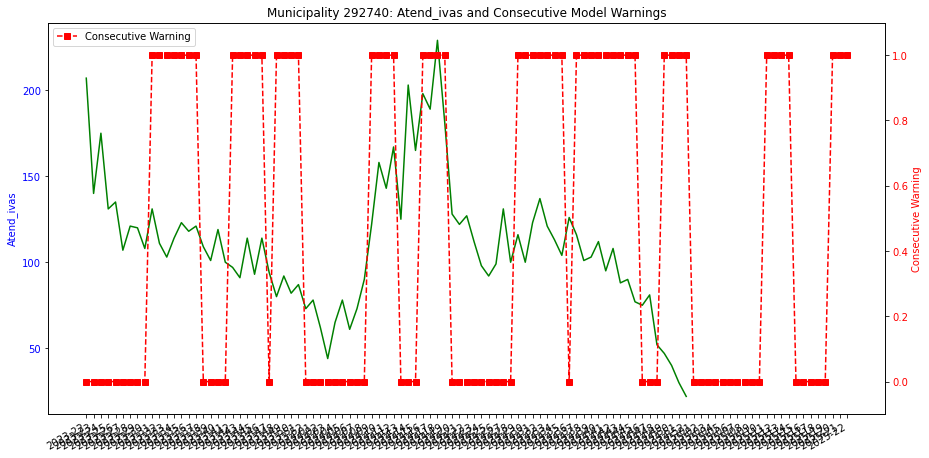

In [192]:
# --- Plot for one municipality ---
plotdf = df_events[df_events["co_ibge"] == muni]

fig, ax1 = plt.subplots(figsize=(15,8))

# atend_ivas line
#ax1.plot(plotdf["year_week"], plotdf["atend_ivas"],  label="Atend_ivas", color="blue")
ax1.plot(plotdf["year_week"], plotdf["n"],  label="AIH", color="green")
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add markers for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["year_week"], plotdf["consecutive_event"], marker="s", color="red", linestyle="--", label="Consecutive Warning")
ax2.set_ylabel("Consecutive Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)


plt.title(f"Municipality {muni}: Atend_ivas and Consecutive Model Warnings")
fig.autofmt_xdate()
plt.legend(loc="upper left")
plt.show()


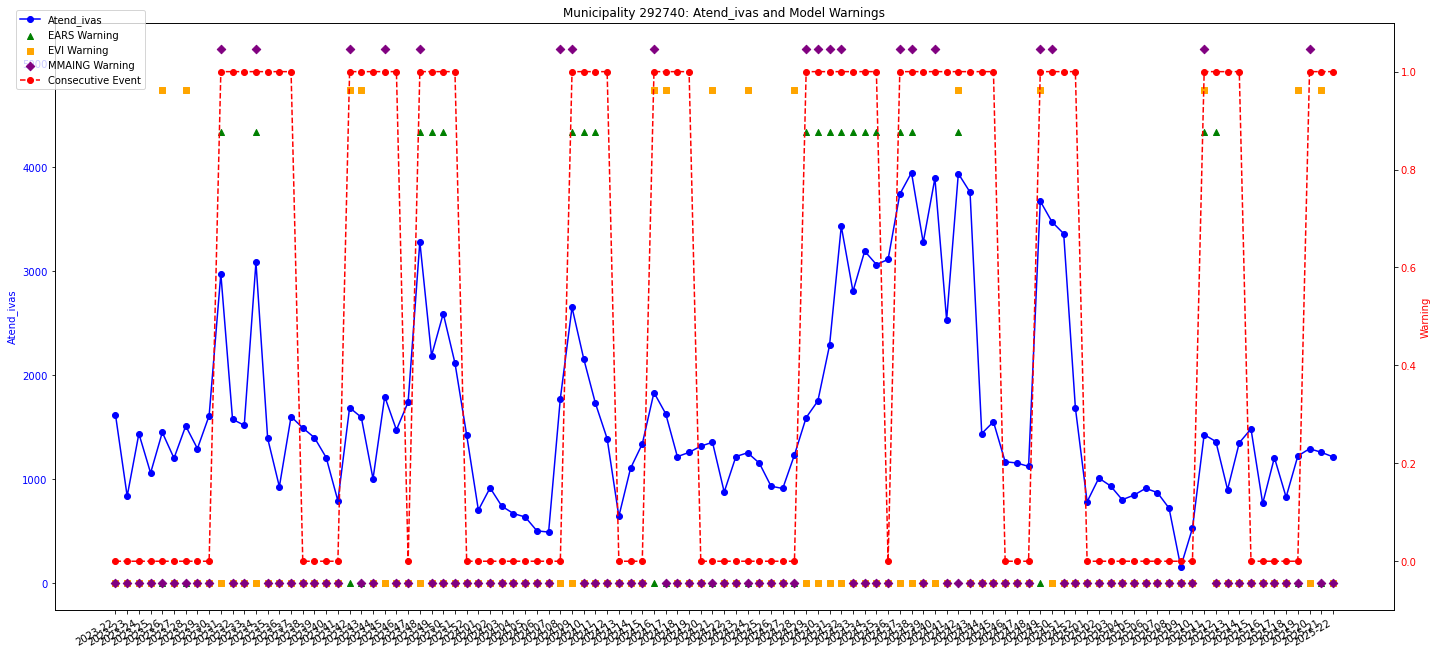

In [195]:
# --- Plot for one municipality ---
plotdf = df_events[df_events["co_ibge"] == muni]

fig, ax1 = plt.subplots(figsize=(24,12))

# atend_ivas line
ax1.plot(plotdf["year_week"], plotdf["atend_ivas"], marker="o", label="Atend_ivas", color="blue")
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add markers for individual model warnings
ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_ears_ivas"] * plotdf["atend_ivas"].max()*1.1, 
            marker="^", color="green", label="EARS Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_evi_ivas"] * plotdf["atend_ivas"].max()*1.2, 
            marker="s", color="orange", label="EVI Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_mmaing_ivas"] * plotdf["atend_ivas"].max()*1.3, 
            marker="D", color="purple", label="MMAING Warning")

# Add secondary axis for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["year_week"], plotdf["consecutive_event"], 
         marker="o", color="red", linestyle="--", label="Consecutive Event")
ax2.set_ylabel("Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)

# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title(f"Municipality {muni}: Atend_ivas and Model Warnings")
fig.autofmt_xdate()
plt.show()


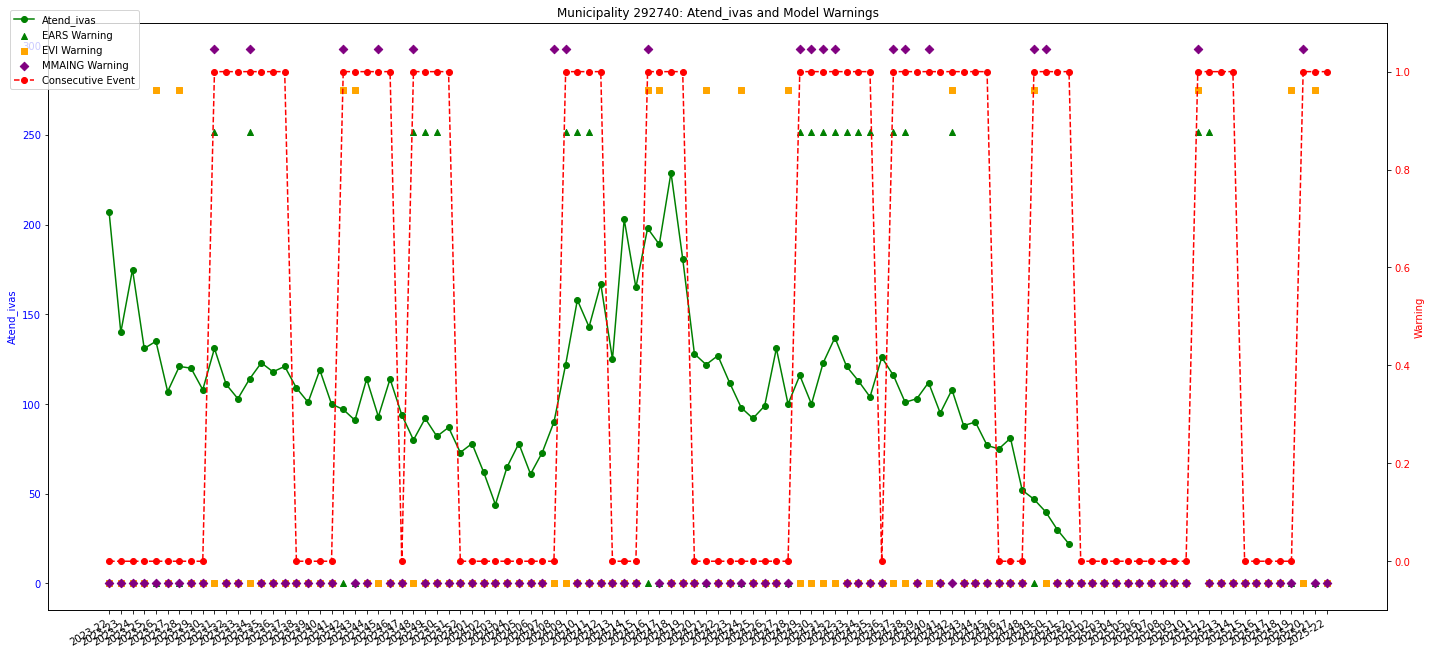

In [197]:
# --- Plot for one municipality ---
plotdf = df_events[df_events["co_ibge"] == muni]

fig, ax1 = plt.subplots(figsize=(24,12))

# atend_ivas line
ax1.plot(plotdf["year_week"], plotdf["n"], marker="o", label="Atend_ivas", color='green')
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add markers for individual model warnings
ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_ears_ivas"] * plotdf["n"].max()*1.1, 
            marker="^", color="green", label="EARS Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_evi_ivas"] * plotdf["n"].max()*1.2, 
            marker="s", color="orange", label="EVI Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_mmaing_ivas"] * plotdf["n"].max()*1.3, 
            marker="D", color="purple", label="MMAING Warning")

# Add secondary axis for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["year_week"], plotdf["consecutive_event"], 
         marker="o", color="red", linestyle="--", label="Consecutive Event")
ax2.set_ylabel("Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)

# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title(f"Municipality {muni}: Atend_ivas and Model Warnings")
fig.autofmt_xdate()
plt.show()


# See what can be done with prob

In [110]:
# Define predictors and target
X = plotdf[['P_growth_aps_ivas']] 

#X = sm.add_constant(X)  # adds intercept
y = plotdf[ 'consecutive_event']

# Fit logistic regression
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.693139
         Iterations 3


In [111]:
# Print results
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:      consecutive_event   No. Observations:                  105
Model:                          Logit   Df Residuals:                      104
Method:                           MLE   Df Model:                            0
Date:                Tue, 26 Aug 2025   Pseudo R-squ.:                -0.05903
Time:                        17:24:13   Log-Likelihood:                -72.780
converged:                       True   LL-Null:                       -68.723
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
P_growth_aps_ivas     0.0148      0.366      0.040      0.968      -0.703       0.733


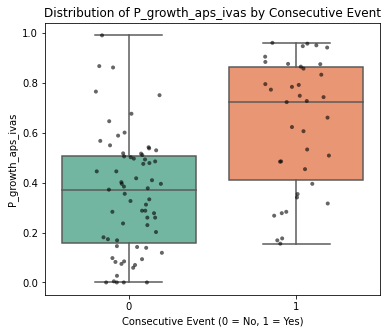

In [112]:
# Create boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x="consecutive_event", y="P_growth_aps_ivas", data=plotdf, palette="Set2")

# Add scatter (optional) for individual points
sns.stripplot(x="consecutive_event", y="P_growth_aps_ivas", data=plotdf, 
              color="black", size=4, jitter=0.2, alpha=0.6)

plt.xlabel("Consecutive Event (0 = No, 1 = Yes)")
plt.ylabel("P_growth_aps_ivas")
plt.title("Distribution of P_growth_aps_ivas by Consecutive Event")
plt.show()


In [113]:
# Create new variable
plotdf["high_growth_consec"] = ((plotdf["P_growth_aps_ivas"] >= 0.6) & (plotdf["consecutive_event"] == 1)).astype(int)




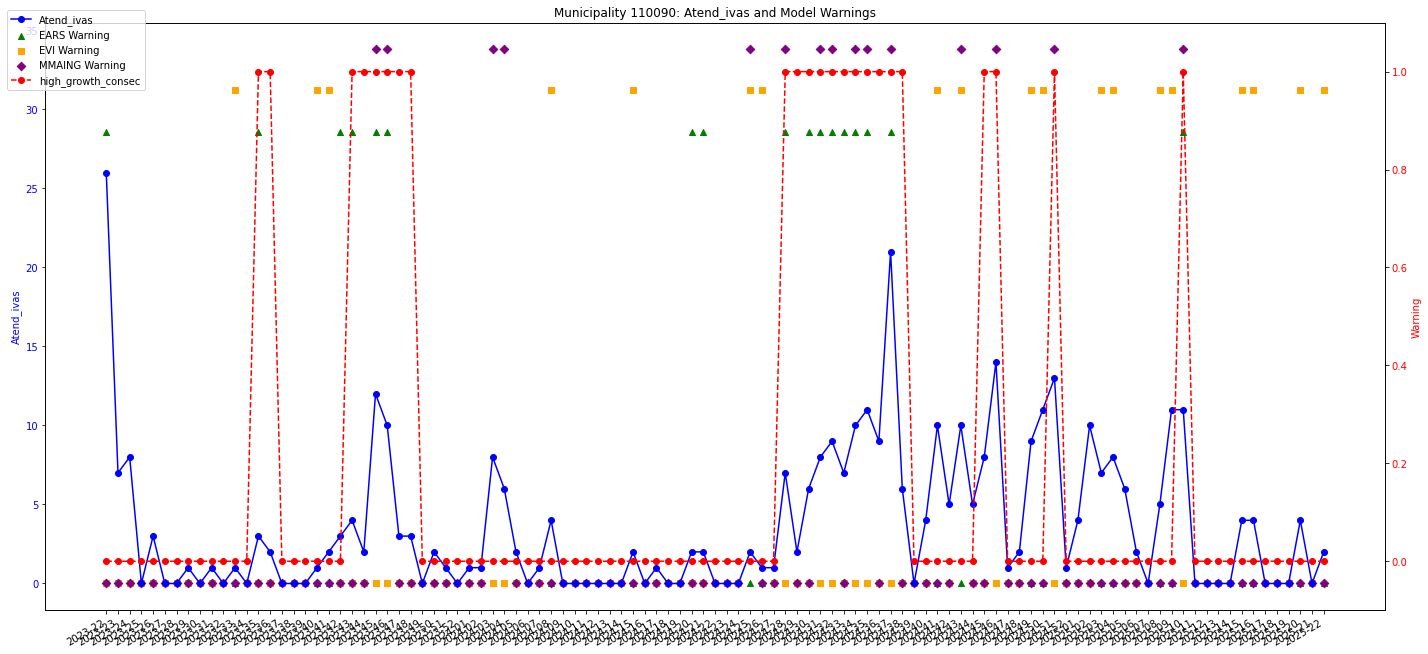

In [115]:
fig, ax1 = plt.subplots(figsize=(24,12))

# atend_ivas line
ax1.plot(plotdf["year_week"], plotdf["atend_ivas"], marker="o", label="Atend_ivas", color="blue")
ax1.set_ylabel("Atend_ivas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Add markers for individual model warnings
ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_ears_ivas"] * plotdf["atend_ivas"].max()*1.1, 
            marker="^", color="green", label="EARS Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_evi_ivas"] * plotdf["atend_ivas"].max()*1.2, 
            marker="s", color="orange", label="EVI Warning")

ax1.scatter(plotdf["year_week"], 
            plotdf["sinal_mmaing_ivas"] * plotdf["atend_ivas"].max()*1.3, 
            marker="D", color="purple", label="MMAING Warning")

# Add secondary axis for consecutive warnings
ax2 = ax1.twinx()
ax2.plot(plotdf["year_week"], plotdf["high_growth_consec"], 
         marker="o", color="red", linestyle="--", label="high_growth_consec")
ax2.set_ylabel("Warning", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(-0.1, 1.1)

# Legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title(f"Municipality {muni}: Atend_ivas and Model Warnings")
fig.autofmt_xdate()
plt.show()


# Analise da  sincronia 

In [136]:
table_ears_evi = table_ears_evi.assign(sinc = table_ears_evi.missed_ears_evi/table_ears_evi.total_evi_warning)

In [139]:
table_ears_evi[table_ears_evi.sinc <= 0.4]

,co_ibge,n3_ears_evi,n2_ears_evi,n1_ears_evi,n0_ears_evi,n1_after_ears_evi,missed_ears_evi,TP_ears_evi,TN1_ears_evi,FP1_ears_evi,FN_ears_evi,total_evi_warning,sinc
3350,220710,0,0,0,1,0,0,1,93,11,0,1,0.0
4377,354995,1,0,0,0,0,0,1,80,24,0,1,0.0


In [150]:
table_ears_evi[table_ears_evi.sinc <= 0.6]

,co_ibge,n3_ears_evi,n2_ears_evi,n1_ears_evi,n0_ears_evi,n1_after_ears_evi,missed_ears_evi,TP_ears_evi,TN1_ears_evi,FP1_ears_evi,FN_ears_evi,total_evi_warning,sinc
1,110146,1,1,0,3,1,4,5,56,40,4,9,0.444444
267,160023,0,0,0,4,0,5,4,66,30,5,9,0.555556
536,220885,1,0,0,2,0,4,3,46,52,4,7,0.571429
659,330160,1,0,0,3,1,6,4,47,48,6,10,0.600000
1568,411740,1,0,0,1,0,3,2,88,12,3,5,0.600000
2568,280010,0,0,0,2,0,2,2,89,12,2,4,0.500000
3199,330140,0,0,0,3,1,3,3,57,42,3,6,0.500000
3350,220710,0,0,0,1,0,0,1,93,11,0,1,0.000000
3486,410165,2,0,0,4,1,6,6,57,36,6,12,0.500000
3779,355640,0,0,0,2,0,2,2,73,28,2,4,0.500000
